In [1]:
import networkx as nx
import requests
import json
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
class makerGraph(object):
    def __init__(self, G):
        self.graph = G
        
    def create_edge(self, parent, item):
        if 'deps' in parent:
            for dps in parent['deps']:
                w = item.get('steps', 0)
                self.graph.add_edge(item['name'], dps['name'], weight=w+1)

    def create_node(self, item):
        self.graph.add_node(item['name'], object=item)

    def make(self, data):
        for item in data:
            self.create_node(item)
            self.create_edge(item, item)

            for sub in item['nodes']:
                self.create_node(sub)
                self.create_edge(sub, sub)
                
        return self
    
    def get_graph(self):
        return self.graph

In [ ]:
pipeline = [
    {'$match': {'name':'root', 'roles._id': '593f49be42d3ed97390f25a7'}},
    {
        '$graphLookup': {
            'from': 'applications',
            'startWith': '$deps._id',
            'connectFromField': 'deps._id',
            'connectToField': '_id',
            'as': 'nodes',
            'maxDepth': 10,
            'depthField': 'steps'
        }
    },
    {'$project': {'name': 1, 'deps': 1, 'deps': 1, 'nodes.name': 1, 'nodes.steps': 1, 'nodes.deps': 1}}
];

jpipeline = json.dumps(pipeline)

data = requests.post('http://localhost:5010/aggregate', json={'entity': 'applications', 'pipeline': jpipeline})
data = data.json()

{'root': (27.0, 80.354), 'app2': (99.0, 80.354), 'nodejs': (207.0, 142.71), 'app3': (171.0, 80.354), 'app4': (207.0, 18.0)}
['app2']


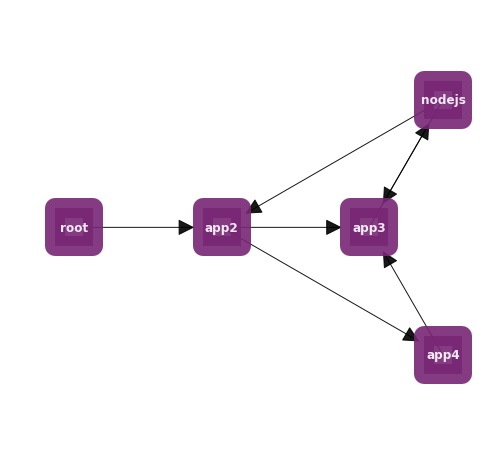

In [ ]:
G = nx.DiGraph()
Graph = makerGraph(G).make(data['items']).get_graph()

options = {
    'with_labels': True, 
    'font_weight': 'bold',
    'arrowsize': 35, 
    'node_shape': 's',
    'node_size': 1500,
    'node_color': '#782675',
    'font_color': 'white',
    'alpha': 0.9,
    'linewidths': 20
}

pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(8, 8))
plt.axis('equal')
nx.draw(G, pos, **options)

print(pos)
print(list(G.adj['root']))

#neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp.
#edge_labels = nx.get_edge_attributes(G,'weight')
#edges = nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels)
#plt.savefig('plot.svg')

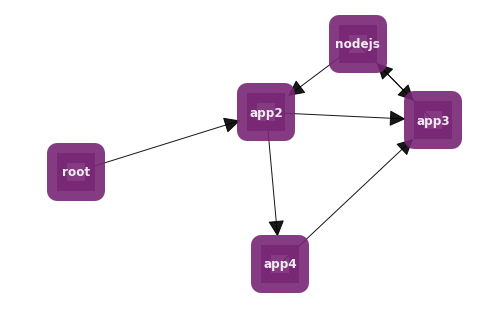

In [665]:
pos=nx.spring_layout(G)
nx.draw(G, **options)

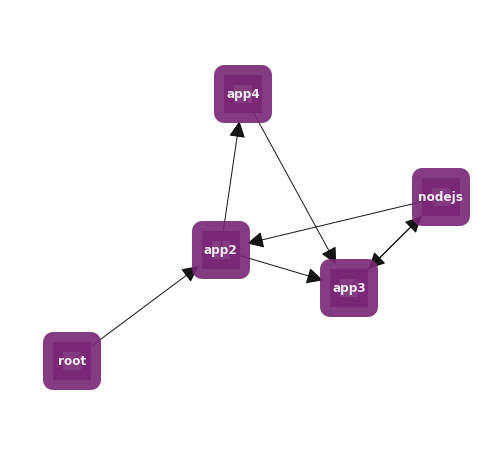

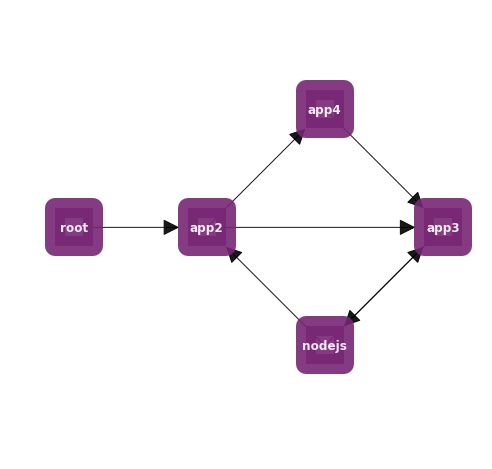

In [666]:
pos = graphviz_layout(G, args='', root='root')
plt.figure(figsize=(8, 8))
plt.axis('equal')
nx.draw(G, pos, **options)

pos = graphviz_layout(G, prog='circo', args='', root='root')
plt.figure(figsize=(8, 8))
plt.axis('equal')
nx.draw(G, pos, **options)

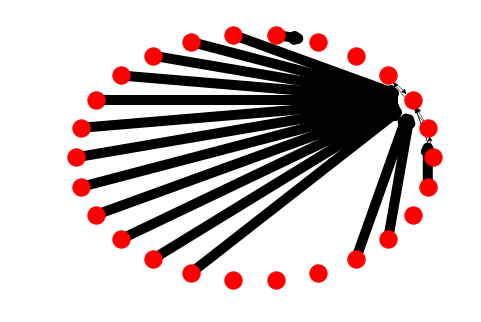

In [320]:
pos = nx.circular_layout(G)

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, width=weights)

In [671]:
from networkx.readwrite import json_graph

i = 0
for n in G:
    i = i+1
    G.nodes[n]['name'] = i
    G.nodes[n]['id'] = i
    
d = json_graph.node_link_data(G)  # node-link format to serialize
# write json
json.dump(d, open('force.json', 'w'))
print(d)

nx.write_gexf(G, "test.gexf")

{'directed': True, 'multigraph': False, 'graph': {}, 'nodes': [{'object': {'_id': '5b2d5fdffb3bcb42ee214cfd', 'name': 'root', 'deps': [{'endpoint': 'rest', '_id': '5b29aecf2a150fefef555a71', 'family': 'Application', 'name': 'app2'}], 'nodes': [{'name': 'nodejs', 'deps': [{'endpoint': 'rest', '_id': '5b29aecf2a150fefef555a71', 'family': 'Application', 'name': 'app2'}, {'endpoint': 'rest', '_id': '5b29aed32a150fefef555a72', 'family': 'Application', 'name': 'app3'}], 'steps': 2}, {'name': 'app3', 'deps': [{'endpoint': 'rest', '_id': '5b26c68cee4773b4e99e0313', 'family': 'Application', 'name': 'nodejs', 'environment': 'Production'}], 'steps': 1}, {'name': 'app4', 'deps': [{'endpoint': 'rest', '_id': '5b29aed32a150fefef555a72', 'family': 'Application', 'name': 'app3'}], 'steps': 1}, {'name': 'app2', 'deps': [{'endpoint': 'rest', '_id': '5b29aed32a150fefef555a72', 'family': 'Application', 'name': 'app3'}, {'endpoint': 'rest', '_id': '5b2d3665fb3bcb42ee214cfc', 'family': 'Application', 'name'

In [612]:
G = nx.barbell_graph(6, 3)
# this d3 example uses the name attribute for the mouse-hover value,
# so add a name to each node
for n in G:
    G.nodes[n]['name'] = n
# write json formatted data
d = json_graph.node_link_data(G)  # node-link format to serialize
# write json
json.dump(d, open('force2.json', 'w'))

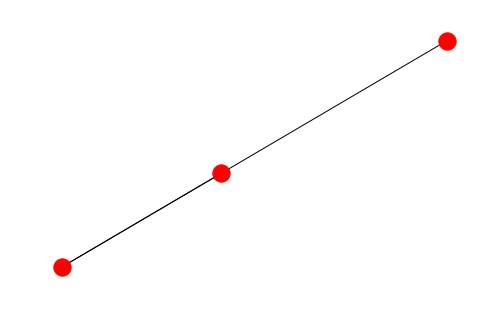